**Logistic Regression:**


    Y = wX + b

> Y --> dependent variable

> X --> Independent Variable

> w --> weight

> b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

    w = w - learning_rate*dw

    b = b - learning_rate*db

-learning rate is also denoted by alpha.

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

In [30]:
# import the library
import numpy as np

In [31]:
# creating a class for Lasso Regression
class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization
    for i in range(self.no_of_iterations):
      self.upadte_weights()


  # function for updating the weight & bias value
  def upadte_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m

      else :

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  # Predicting the Target variable
  def predict(self,X):

    return X.dot(self.w) + self.b

Using Lasso Regression for Prediction

In [32]:
# importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [33]:
# loading the data from csv file to a pandas dataframe
salary_data = pd.read_csv('/content/salary_data.csv')

In [34]:
# printing the first 5 columns of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [35]:
# last 5 rows of the dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [36]:
# number of rows & columns in the dataframe
salary_data.shape

(30, 2)

In [37]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the feature & target

In [38]:
features = salary_data.iloc[:,:-1].values
target = salary_data.iloc[:,1].values

In [39]:
print(features)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [40]:
print(target)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into training & test data

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.33, random_state = 2)

Training the Lasso Regression model

In [51]:
model = Lasso_Regression(learning_rate = 0.02, no_of_iterations=1000, lambda_parameter=200)

In [43]:
model.fit(X_train, Y_train)

Predict the salary value for test data

In [44]:
test_data_prediction = model.predict(X_test)

In [45]:
print(test_data_prediction)

[ 36068.90441536  34166.14804787  66513.00629512  58901.98082518
  91248.83907243  80783.67905126 101713.9990936   52242.33353898
  42728.55170156  88394.7045212 ]


In [46]:
from sklearn import metrics

# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9041366551714738
Mean Absolute Error :  6675.382767802961


Comparing the error with SKLearn Lasso Regression

In [47]:
from sklearn.linear_model import Lasso
sk_model = Lasso()

In [48]:
sk_model.fit(X_train, Y_train)

Lasso()

In [49]:
sk_test_data_prediction = sk_model.predict(X_test)

In [50]:
# R squared error
score_1_ = metrics.r2_score(Y_test, sk_test_data_prediction)

# Mean Absolute Error
score_2_ = metrics.mean_absolute_error(Y_test, sk_test_data_prediction)

print("R squared error : ", score_1_)
print('Mean Absolute Error : ', score_2_)

R squared error :  0.9041817142395875
Mean Absolute Error :  6673.480440148538


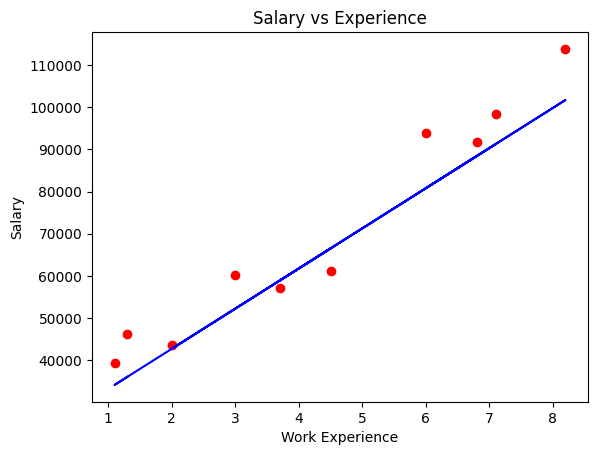

In [55]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, sk_test_data_prediction, color='blue')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()

    Hasrat Ali
    Thank You:)